In [3]:
import pandas as pd

In [4]:
filename='data/netflix_titles.csv'
df = pd.read_csv(filename, parse_dates=['date_added'])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [8]:
df.isna().sum() #contar quantos dados nulos possuem em cada coluna

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df[df.duplicated()] #verifica os dados duplicados

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [10]:
df['country'].value_counts() #conta quantos filmes tem em cada coluna de dados country

country
United States                                    2818
India                                             972
United Kingdom                                    419
Japan                                             245
South Korea                                       199
                                                 ... 
Russia, Spain                                       1
Croatia, Slovenia, Serbia, Montenegro               1
Japan, Canada                                       1
United States, France, South Korea, Indonesia       1
United Arab Emirates, Jordan                        1
Name: count, Length: 748, dtype: int64

In [15]:
df['country'].value_counts(normalize=True) *100  #agora exibe em percentual

country
United States                                    35.330993
India                                            12.186560
United Kingdom                                    5.253260
Japan                                             3.071715
South Korea                                       2.494985
                                                   ...    
Russia, Spain                                     0.012538
Croatia, Slovenia, Serbia, Montenegro             0.012538
Japan, Canada                                     0.012538
United States, France, South Korea, Indonesia     0.012538
United Arab Emirates, Jordan                      0.012538
Name: proportion, Length: 748, dtype: float64

In [16]:
df.groupby('release_year')

In [17]:
df.groupby('release_year').count() #mostra quantos filmes liberados a cada ano

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
release_year,,,,,,,,,,,
1925,1,1,1,0,0,0,1,1,1,1,1
1942,2,2,2,2,1,2,2,2,2,2,2
1943,3,3,3,3,0,3,3,3,3,3,3
1944,3,3,3,3,1,3,3,3,3,3,3
1945,4,4,4,3,1,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...
2017,1032,1032,1032,773,912,966,1016,1031,1031,1032,1032
2018,1147,1147,1147,760,1026,1038,1140,1147,1147,1147,1147
2019,1030,1030,1030,629,917,913,1030,1030,1030,1030,1030


In [18]:
df.groupby('release_year').agg(nunique=('show_id','nunique')).sort_values('nunique', ascending=False) # agrupa por ano, conta os não repetidos e exibe em ordem decrescente

,nunique
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1925,1
1947,1
1959,1


In [19]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [20]:
!pip install seaborn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------------------------- -- 7.6/8.1 MB 37.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 34.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 34.0 MB/s eta 0:00:00


In [21]:
import seaborn as sns

In [22]:
import matplotlib.pyplot as plt

In [23]:
%matplotlib inline

In [24]:
df.hist(figsize=(20,20))

array([[<Axes: title={'center': 'date_added'}>,
        <Axes: title={'center': 'release_year'}>]], dtype=object)

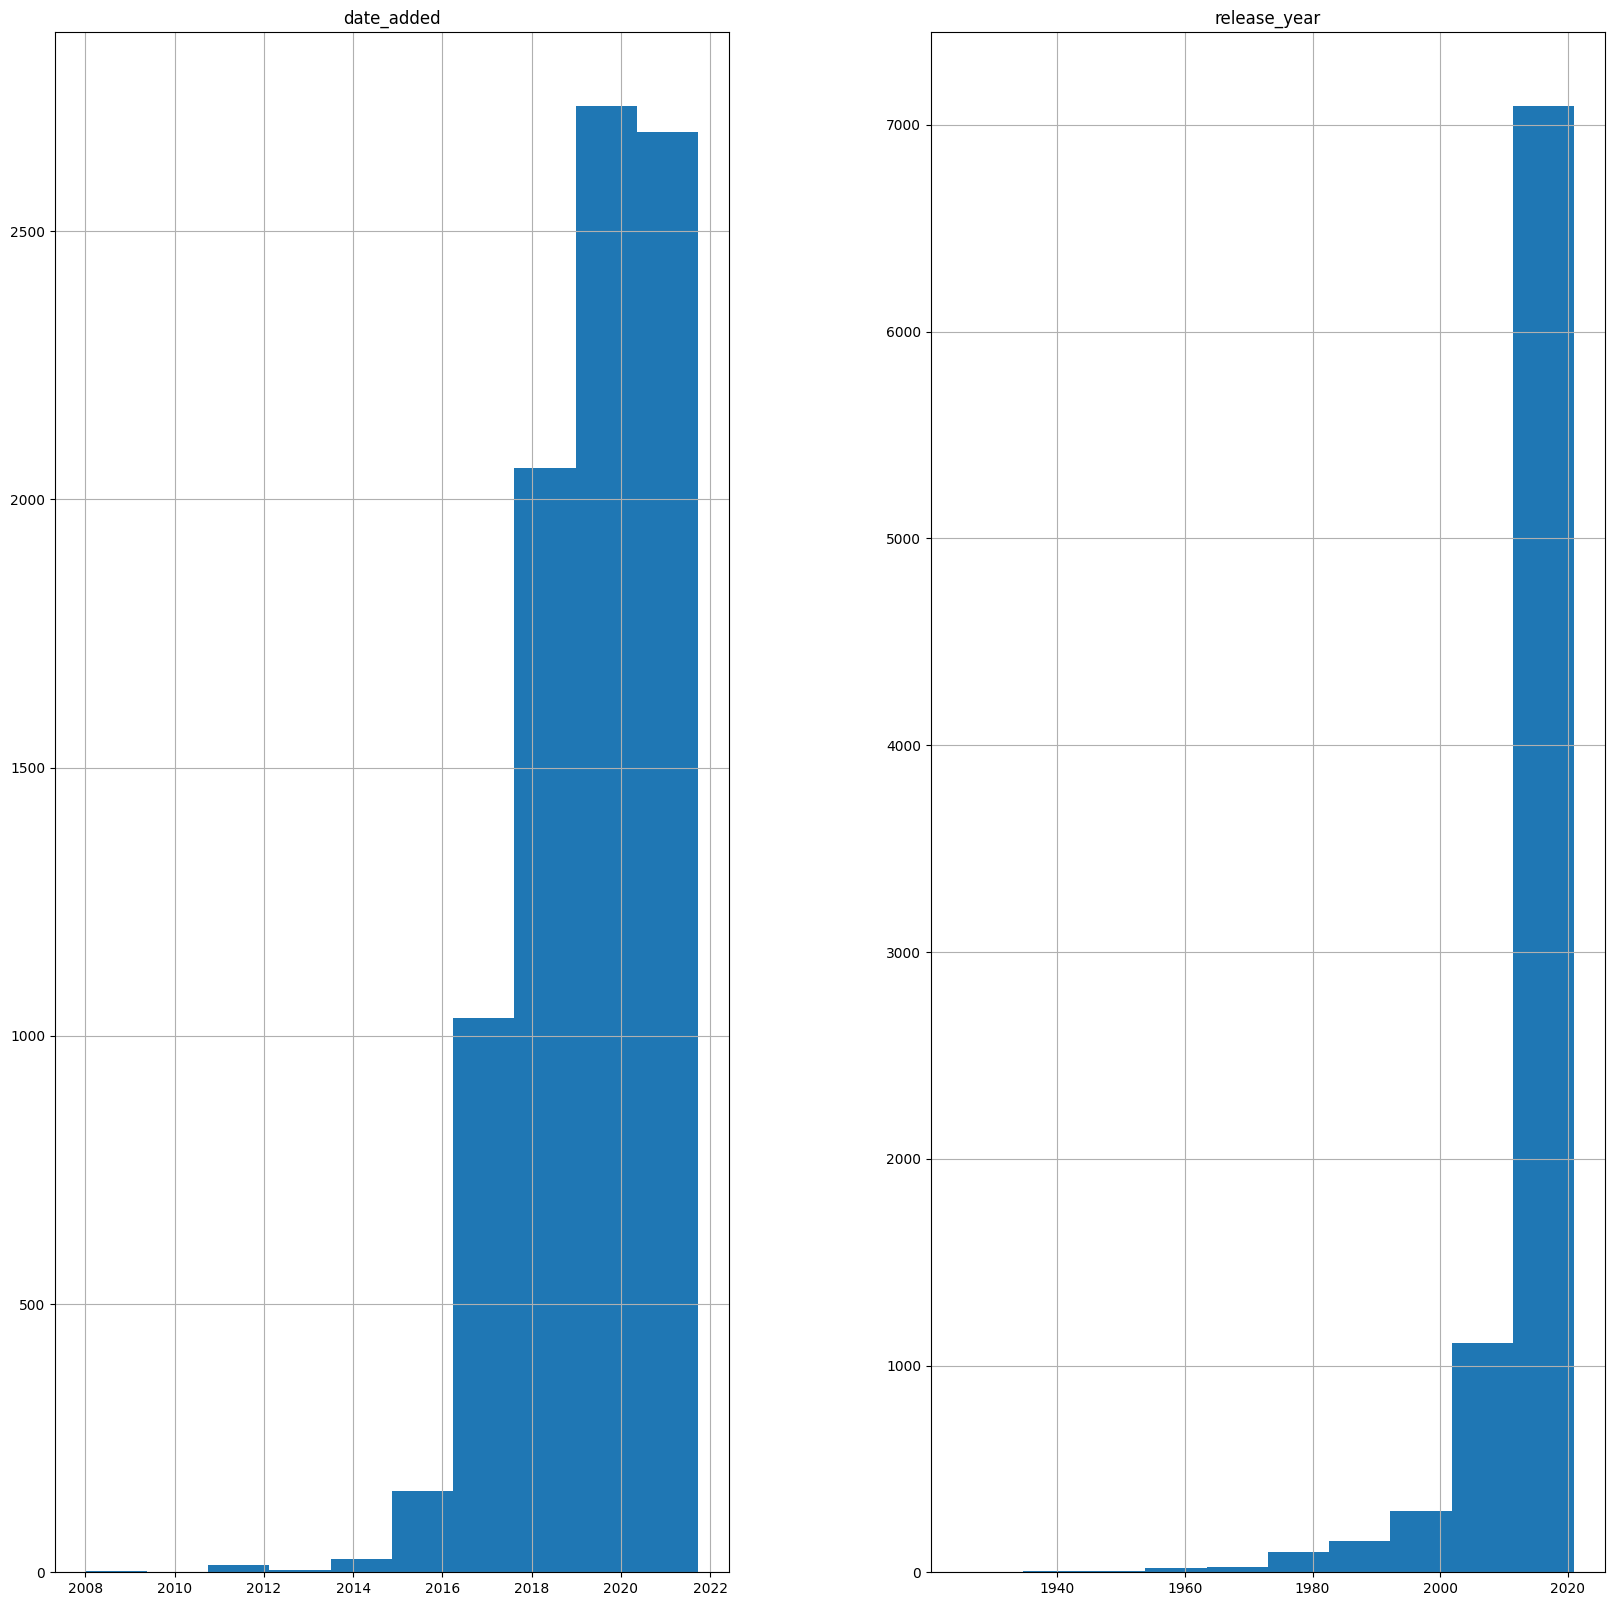

In [25]:
plt.show()